In [9]:
import pandas as pd
import numpy as np
import random
import os
from num2words import num2words

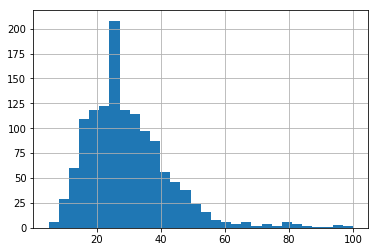

In [56]:
data = pd.read_csv("csvs/commands_v4_manually_updated_shuffled_1300.csv") 
ax = data["num_chars"].hist(bins = 30)

In [57]:
#data =  data.set_index('command_id')
data.loc[1].command_name # the explicit index is command_id that starts with 1!

'play the playlist Favourite songs'

In [58]:
data.index

RangeIndex(start=0, stop=1299, step=1)

In [59]:
num_copies = 2
ids = []
for i in range(num_copies):
    ids_curr =  list(data.index) # based on command_id
    random.shuffle(ids_curr)
    ids = ids + ids_curr
ids = np.array(ids)

In [101]:
frames_per_char = 5
max_num_frames = 900
num_pos = 9
num_trials = 2
path = os.getcwd()+"\\csvs\\v1\\fpc{}".format(frames_per_char)
if (not os.path.isdir(path)):
    try:
        os.makedirs(path)
    except OSError:
        print ("Creation of the directory %s failed" % path)
    else:
        print ("Successfully created the directory %s " % path)

Successfully created the directory C:\Users\user\Downloads\csvs\v1\fpc5 


In [102]:
data.loc[ids[0]].num_chars*frames_per_char

340

In [113]:
df = pd.DataFrame(columns = ["command_name","command_id","set_id","pos_id","expr_id",'subject_id','trial_id',"start_fr_id", "end_fr_id","num_chars"])
df['command_id'] = ids

i = 0
set_id = 1
while i<len(ids):
    t = i
    cum_command_num_fr = 1
    for j in range(i, len(ids)):
        curr_command_num_fr = data.loc[ids[j]].num_chars*frames_per_char
        if(cum_command_num_fr + curr_command_num_fr > max_num_frames):
            #print('max_num_frames - cum_command_num_fr: ', max_num_frames - cum_command_num_fr)
            #print('j-t: ',j-t)
            diff = np.ceil((max_num_frames - cum_command_num_fr)/(j-t))
            #print('diff: ',diff)
            
            temp_end = df[df.set_id==set_id].loc[:,'end_fr_id']
            temp_start = df[df.set_id==set_id].loc[:,'start_fr_id']
            #print('temp_start:\n',temp_start)
            #print('temp_end:\n',temp_end)
            
            diff_end = np.arange(1,len(temp_end)+1)*diff
            diff_start = np.arange(0,len(temp_end))*diff
            #print('diff_end:\n', diff_end)
            #print('diff_start:\n', diff_start)
            
            #print('temp_end+diff_end:\n', temp_end+diff_end)
            #print('temp_start+diff_start:\n', temp_start+diff_start)
            
            df.update(temp_end+diff_end)
            df.update(temp_start+diff_start)

            set_id += 1
            break
        else:
            df.loc[i, 'start_fr_id'] = cum_command_num_fr  
            cum_command_num_fr += curr_command_num_fr
            #print(curr_command_num_fr)
            df.loc[i, 'end_fr_id'] = cum_command_num_fr - 1 
            df.loc[i, 'set_id']= set_id
            df.loc[i, 'pos_id'] = (set_id-1)%num_pos+1
            df.loc[i, 'expr_id'] = int((set_id-1)/num_pos)+1
            df.loc[i, 'command_name'] = data.loc[ids[j]].command_name
            df.loc[i, 'subject_id'] = int((set_id-1)/num_pos/num_trials) + 1
            df.loc[i, 'trial_id'] = int((set_id-1)/num_pos)%num_trials + 1
            df.loc[i,'num_chars'] = data.loc[ids[j]].num_chars
            i+=1

In [104]:
df.to_csv(path+'commands_sub_all_v1_fpc{}.csv'.format(frames_per_char))

In [114]:
for s_id in df.subject_id.unique():
    df_sub = df[df.subject_id==s_id]
    df_sub = df_sub.drop(columns=['set_id', 'expr_id'])
    df_sub_1 = df_sub[df.trial_id==1].copy()
    df_sub_1 = df_sub_1.drop(columns=['subject_id', 'trial_id'])
    df_sub_2 = df_sub[df.trial_id==2].copy()
    df_sub_2 = df_sub_2.drop(columns=['subject_id', 'trial_id'])
    df_sub_1.to_csv(path+'commands_sub{}_trial{}.csv'.format(s_id,1,frames_per_char))
    df_sub_2.to_csv(path+'commands_sub{}_trial{}.csv'.format(s_id,2,frames_per_char))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [116]:
path1 = os.getcwd()+"\\csvs\\v1\\"
num = 54
for sdirs, dirs, files in os.walk(path1):
    for file in files:
        if file != "fpc5commands_sub_all_v1_fpc5.csv":
            p1 = (file.split(".")[0]).split("_")[0]
            inc = False
            if (file.split(".")[0]).split("_")[-1] == "trial2":
                p2 = "_sub"+str(num)+"_"
                inc = True
            else:
                p2 = "_sub"+str(num)+"_"
            p3 = (file.split(".")[0]).split("_")[-1]+".csv"
            if inc:
                num +=1
            name = p1 + p2 + p3
            src = sdirs + file
            dst = sdirs + name
            print(name)
            os.rename(src, dst)

fpc5commands_sub55_trial1.csv
fpc5commands_sub55_trial2.csv
fpc5commands_sub56_trial1.csv
fpc5commands_sub56_trial2.csv
fpc5commands_sub57_trial1.csv
fpc5commands_sub57_trial2.csv
fpc5commands_sub58_trial1.csv
fpc5commands_sub58_trial2.csv
fpc5commands_sub59_trial1.csv
fpc5commands_sub59_trial2.csv
fpc5commands_sub60_trial1.csv
fpc5commands_sub60_trial2.csv
fpc5commands_sub61_trial1.csv
fpc5commands_sub61_trial2.csv
fpc5commands_sub62_trial1.csv
fpc5commands_sub62_trial2.csv
fpc5commands_sub63_trial1.csv
fpc5commands_sub63_trial2.csv
fpc5commands_sub64_trial1.csv
fpc5commands_sub64_trial2.csv
fpc5commands_sub65_trial1.csv
fpc5commands_sub65_trial2.csv
fpc5commands_sub66_trial1.csv
fpc5commands_sub66_trial2.csv
fpc5commands_sub67_trial1.csv
fpc5commands_sub67_trial2.csv
fpc5commands_sub68_trial1.csv
fpc5commands_sub68_trial2.csv
fpc5commands_sub69_trial1.csv
fpc5commands_sub69_trial2.csv
fpc5commands_sub70_trial1.csv
fpc5commands_sub70_trial2.csv
fpc5commands_sub71_trial1.csv
fpc5comman

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'C:\\Users\\user\\Downloads\\csvs\\v1\\fpc5fpc5commands_sub100_trial2.csv' -> 'C:\\Users\\user\\Downloads\\csvs\\v1\\fpc5fpc5commands_sub82_trial2.csv'

In [111]:
df.head()

,command_name,command_id,set_id,pos_id,expr_id,subject_id,trial_id,start_fr_id,end_fr_id,num_chars
0,tasks from Homework list from the last ten day...,258,1,1,1,1,1,1,372,68
1,describe a picture,370,1,1,1,1,1,373,494,18
2,put the curtains down,307,1,1,1,1,1,495,631,21
3,the key of Jingle Bells,564,1,1,1,1,1,632,778,23
4,update my linkedin,172,1,1,1,1,1,779,900,18


In [112]:
df.tail()

,command_name,command_id,set_id,pos_id,expr_id,subject_id,trial_id,start_fr_id,end_fr_id,num_chars
2593,turn shuffle off,730,475,7,53,27,1,451,540,16
2594,tasks from Homework list from the last three d...,1220,475,7,53,27,1,541,900,70
2595,start disco lights,318,476,8,53,27,1,1,90,18
2596,set the temperature of my Tesla car to twenty ...,405,476,8,53,27,1,91,385,59
2597,add song Despacito to Sad songs,859,476,8,53,27,1,386,540,31
